In [24]:
import openai

In [25]:
openai.api_key = os.environ["OPENAI_API_KEY"]

In [26]:
%reload_ext genai

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [3]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [4]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [5]:
!ls -l data

total 16656
-rw-r--r-- 1 pete-00 pete-00 17051982 Apr 17 18:35 mnist.pkl.gz


In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [9]:
lst1 = list(x_train[0])

In [10]:
vals = lst1[200:210]

In [12]:
vals, len(lst1)

([0.0,
  0.0,
  0.0,
  0.19140625,
  0.9296875,
  0.98828125,
  0.98828125,
  0.98828125,
  0.98828125,
  0.98828125],
 784)

In [13]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [ ]:
val_iter = chunks(vals, 5)

In [33]:
len(next(chunks(lst1, 28)))

28

In [34]:
mpl.rcParams['image.cmap'] = 'gray'

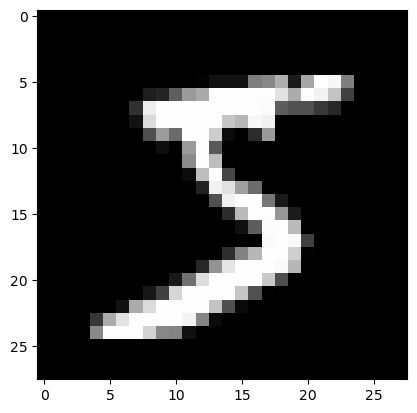

In [39]:
plt.imshow(list(chunks(lst1, 28)))

In [41]:
from itertools import islice

In [45]:
it = iter(lst1)
islice(it, 5)

In [48]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.0, 0.0]

In [51]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

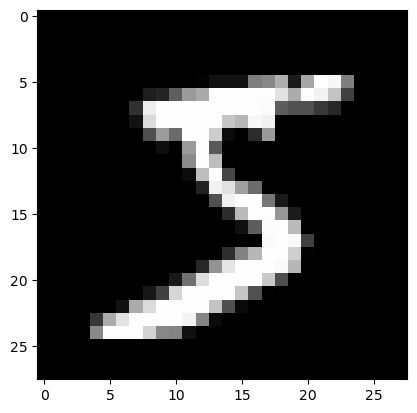

In [53]:
plt.imshow(img)

In [64]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

In [65]:
m = Matrix(img)

In [67]:
m[20,15]

0.98828125

In [68]:
import torch
from torch import tensor

In [69]:
tensor([1,2,3])

tensor([1, 2, 3])

In [70]:
tens = tensor(img)

In [72]:
tens[20,15]

tensor(0.9883)

In [73]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [76]:
x_train.shape

torch.Size([50000, 784])

In [77]:
x_train.dtype

torch.float32

In [81]:
imgs = x_train.reshape(-1, 28, 28)
imgs.shape

torch.Size([50000, 28, 28])

In [91]:
imgs[0].shape

torch.Size([28, 28])

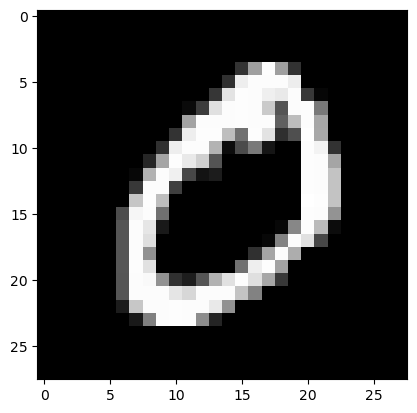

In [84]:
plt.imshow(imgs[1]);

In [92]:
n,c = x_train.shape

In [93]:
n, c

(50000, 784)

In [94]:
x_train.shape

torch.Size([50000, 784])

In [95]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [99]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [100]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

### Random Number Generators

In [101]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [102]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [104]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [127]:
rand(), rand(), rand(),

(0.8109761995922227, 0.363997419116064, 0.037672732243756)

In [128]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.18152103895642924
In child: 0.18152103895642924


In [129]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.1586])
In child: tensor([0.1586])


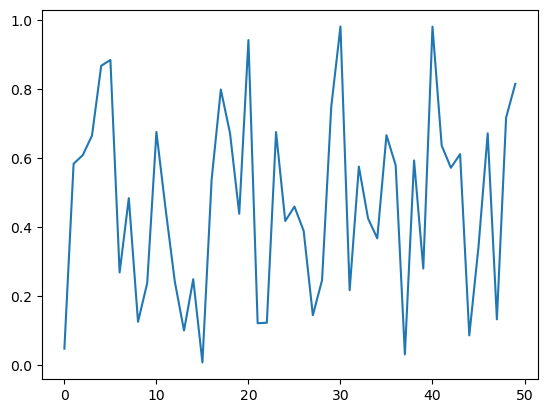

In [130]:
plt.plot([rand() for _ in range(50)]);

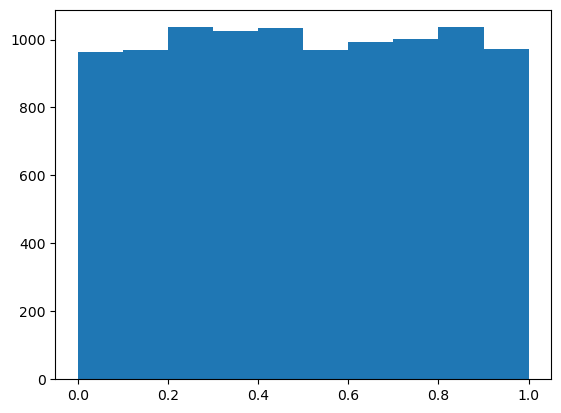

In [131]:
plt.hist([rand() for _ in range(10000)]);

In [132]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.13 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [133]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
46 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Matrix Multiplication